In [1]:
!pip install reverse_geocoder
!pip install geocoder
!pip install folium

In [2]:
import pandas as pd
import zipfile
import reverse_geocoder as rg 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
import types
from botocore.client import Config
import folium
from geopy.geocoders import Nominatim

zf1 = zipfile.ZipFile('/content/train.zip') 
df_train = pd.read_csv(zf1.open('train.csv'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df_train['pickup_datetime']=pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime']=pd.to_datetime(df_train['dropoff_datetime'])


df_train['pickup_day']=df_train['pickup_datetime'].dt.day_name()
df_train['dropoff_day']=df_train['dropoff_datetime'].dt.day_name()
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


In [5]:
df_train.insert(loc = 11,column = 'pickup_location',value = 'N/A')
df_train.insert(loc = 12,column = 'dropoff_location',value='N/A')
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_location,dropoff_location,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,N/A,N/A,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,N/A,N/A,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,N/A,N/A,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,N/A,N/A,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,N/A,N/A,Saturday,Saturday


In [6]:
df_train1 = df_train.sample(20000)
df_train1.reset_index(inplace=True)
df_train1.head()

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_location,dropoff_location,pickup_day,dropoff_day
0,1405760,id0313305,1,2016-01-29 10:59:31,2016-01-29 11:18:55,1,-73.962067,40.767715,-73.984566,40.748676,N,1164,N/A,N/A,Friday,Friday
1,1357829,id1633637,2,2016-03-08 07:19:51,2016-03-08 07:28:23,1,-73.973106,40.757629,-73.983185,40.769199,N,512,N/A,N/A,Tuesday,Tuesday
2,44557,id0064284,1,2016-01-26 10:36:18,2016-01-26 11:55:11,1,-73.863594,40.769630,-73.979897,40.765404,N,4733,N/A,N/A,Tuesday,Tuesday
3,148474,id1885360,1,2016-04-29 12:30:19,2016-04-29 12:57:57,3,-73.967659,40.802330,-73.864960,40.770485,N,1658,N/A,N/A,Friday,Friday
4,436146,id0130391,1,2016-02-14 14:41:37,2016-02-14 14:54:22,1,-73.968681,40.755032,-73.985512,40.756618,N,765,N/A,N/A,Sunday,Sunday


In [8]:
df_train1.head()

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_location,dropoff_location,pickup_day,dropoff_day
0,1405760,id0313305,1,2016-01-29 10:59:31,2016-01-29 11:18:55,1,-73.962067,40.767715,-73.984566,40.748676,N,1164,Manhattan,Long Island City,Friday,Friday
1,1357829,id1633637,2,2016-03-08 07:19:51,2016-03-08 07:28:23,1,-73.973106,40.757629,-73.983185,40.769199,N,512,Manhattan,Manhattan,Tuesday,Tuesday
2,44557,id0064284,1,2016-01-26 10:36:18,2016-01-26 11:55:11,1,-73.863594,40.769630,-73.979897,40.765404,N,4733,The Bronx,Manhattan,Tuesday,Tuesday
3,148474,id1885360,1,2016-04-29 12:30:19,2016-04-29 12:57:57,3,-73.967659,40.802330,-73.864960,40.770485,N,1658,Manhattan,The Bronx,Friday,Friday
4,436146,id0130391,1,2016-02-14 14:41:37,2016-02-14 14:54:22,1,-73.968681,40.755032,-73.985512,40.756618,N,765,Long Island City,Manhattan,Sunday,Sunday


In [7]:
for i in range(len(df_train1)):
  print(i)
  df_train1['pickup_location'][i] = rg.search((df_train1['pickup_latitude'][i],df_train1['pickup_longitude'][i]))[0]['name']
  df_train1['dropoff_location'][i] = rg.search((df_train1['dropoff_latitude'][i],df_train1['dropoff_longitude'][i]))[0]['name']


from google.colab import files
df_train1.to_csv('train.csv') 
files.download('train.csv')

0
Loading formatted geocoded file...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Streaming output truncated to the last 5000 lines.
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
dk = df_train1.groupby(['pickup_location'])

In [14]:
df_train1['pickup_location'].value_counts()

Manhattan              7733
New York City          5689
Long Island City       3046
Weehawken              1962
The Bronx               492
Inwood                  373
Hoboken                 223
Guttenberg              123
Edgewater               117
Jamaica                 112
Brooklyn                 85
Borough of Queens        12
East New York             9
Bensonhurst               5
Fort Lee                  4
Bayonne                   2
Newark                    2
Morristown                1
Jersey City               1
South Valley Stream       1
Hempstead                 1
North Haledon             1
Hasbrouck Heights         1
East Atlantic Beach       1
West New York             1
Elmwood Park              1
Coney Island              1
White Plains              1
Name: pickup_location, dtype: int64

In [17]:
df_train1.head()

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_location,dropoff_location,pickup_day,dropoff_day
0,1405760,id0313305,1,2016-01-29 10:59:31,2016-01-29 11:18:55,1,-73.962067,40.767715,-73.984566,40.748676,N,1164,Manhattan,Long Island City,Friday,Friday
1,1357829,id1633637,2,2016-03-08 07:19:51,2016-03-08 07:28:23,1,-73.973106,40.757629,-73.983185,40.769199,N,512,Manhattan,Manhattan,Tuesday,Tuesday
2,44557,id0064284,1,2016-01-26 10:36:18,2016-01-26 11:55:11,1,-73.863594,40.769630,-73.979897,40.765404,N,4733,The Bronx,Manhattan,Tuesday,Tuesday
3,148474,id1885360,1,2016-04-29 12:30:19,2016-04-29 12:57:57,3,-73.967659,40.802330,-73.864960,40.770485,N,1658,Manhattan,The Bronx,Friday,Friday
4,436146,id0130391,1,2016-02-14 14:41:37,2016-02-14 14:54:22,1,-73.968681,40.755032,-73.985512,40.756618,N,765,Long Island City,Manhattan,Sunday,Sunday


In [20]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

In [21]:
df_train1['pickup_timezone']=df_train1['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df_train1['dropoff_timezone']=df_train1['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [22]:
df_train1

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_location,dropoff_location,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone
0,1405760,id0313305,1,2016-01-29 10:59:31,2016-01-29 11:18:55,1,-73.962067,40.767715,-73.984566,40.748676,N,1164,Manhattan,Long Island City,Friday,Friday,midday,midday
1,1357829,id1633637,2,2016-03-08 07:19:51,2016-03-08 07:28:23,1,-73.973106,40.757629,-73.983185,40.769199,N,512,Manhattan,Manhattan,Tuesday,Tuesday,morning,morning
2,44557,id0064284,1,2016-01-26 10:36:18,2016-01-26 11:55:11,1,-73.863594,40.769630,-73.979897,40.765404,N,4733,The Bronx,Manhattan,Tuesday,Tuesday,midday,midday
3,148474,id1885360,1,2016-04-29 12:30:19,2016-04-29 12:57:57,3,-73.967659,40.802330,-73.864960,40.770485,N,1658,Manhattan,The Bronx,Friday,Friday,midday,midday
4,436146,id0130391,1,2016-02-14 14:41:37,2016-02-14 14:54:22,1,-73.968681,40.755032,-73.985512,40.756618,N,765,Long Island City,Manhattan,Sunday,Sunday,midday,midday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,120698,id3766678,2,2016-03-18 06:53:52,2016-03-18 07:01:23,5,-73.975510,40.757881,-73.991341,40.749641,N,451,Manhattan,Weehawken,Friday,Friday,morning,morning
19996,920548,id2868019,2,2016-03-19 22:25:23,2016-03-19 22:59:31,2,-74.013550,40.713802,-73.913857,40.765343,N,2048,New York City,Long Island City,Saturday,Saturday,late night,late night
19997,470457,id0252516,2,2016-05-14 23:21:39,2016-05-14 23:31:29,1,-73.980652,40.744987,-73.991943,40.726551,N,590,Long Island City,New York City,Saturday,Saturday,late night,late night
19998,810156,id3712035,1,2016-06-14 22:04:37,2016-06-14 22:11:51,1,-73.972374,40.749458,-73.975410,40.749050,N,434,Long Island City,Long Island City,Tuesday,Tuesday,late night,late night


In [23]:
df_train1.to_csv('train.csv') 
files.download('train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
df_test1 = pd.read_csv('/content/test.csv')
df_test1.head()

,Unnamed: 0,index,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_location,dropoff_location
0,0,153584,id1844340,2,2016-05-16 04:08:05,1,-73.971687,40.750500,-73.985970,40.757591,N,Monday,Long Island City,Manhattan
1,1,596946,id1283331,1,2016-01-09 23:55:58,1,-73.956406,40.771408,-73.958832,40.763779,N,Saturday,Manhattan,Manhattan
2,2,178795,id1899427,1,2016-05-08 22:52:04,1,-73.989502,40.741306,-73.988159,40.756496,N,Sunday,New York City,Manhattan
3,3,34861,id2758094,2,2016-06-20 12:35:56,2,-73.952545,40.780846,-73.964653,40.791828,N,Monday,Manhattan,Manhattan
4,4,454817,id3379567,2,2016-02-21 13:44:03,1,-73.991257,40.750408,-74.005844,40.740280,N,Sunday,Weehawken,New York City


In [25]:
df_test1['pickup_timezone']=df_test1['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [26]:
df_test1.head()

,Unnamed: 0,index,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_location,dropoff_location,pickup_timezone
0,0,153584,id1844340,2,2016-05-16 04:08:05,1,-73.971687,40.750500,-73.985970,40.757591,N,Monday,Long Island City,Manhattan,morning
1,1,596946,id1283331,1,2016-01-09 23:55:58,1,-73.956406,40.771408,-73.958832,40.763779,N,Saturday,Manhattan,Manhattan,late night
2,2,178795,id1899427,1,2016-05-08 22:52:04,1,-73.989502,40.741306,-73.988159,40.756496,N,Sunday,New York City,Manhattan,late night
3,3,34861,id2758094,2,2016-06-20 12:35:56,2,-73.952545,40.780846,-73.964653,40.791828,N,Monday,Manhattan,Manhattan,midday
4,4,454817,id3379567,2,2016-02-21 13:44:03,1,-73.991257,40.750408,-74.005844,40.740280,N,Sunday,Weehawken,New York City,midday


In [27]:
df_test1.to_csv('test1.csv') 
files.download('test1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

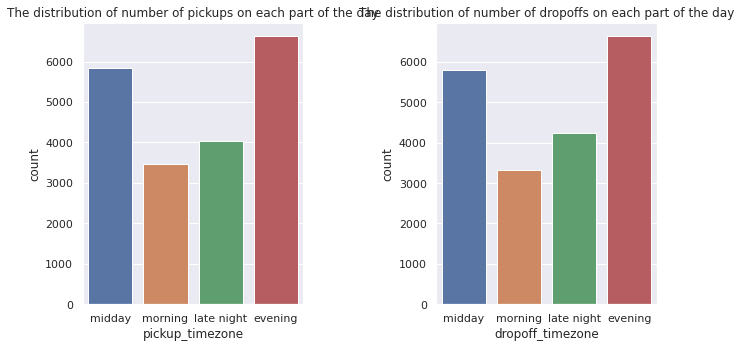

In [28]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df_train1,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df_train1,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()